# Ford GoBike System Data

###### by Hager Mohamed

## Preliminary Wrangling

This document explores a dataset containing the trip data of the ford gobike approximately 183,412.


In [35]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [36]:
df = pd.read_csv('fordgobike-tripdata.csv')

### Assessment

In [37]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [38]:
df.shape

(183412, 16)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [40]:
df[df.duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [41]:
df['member_gender'].value_counts()


Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [42]:
df['member_birth_year'].value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1930.0        1
1910.0        1
1927.0        1
1928.0        1
1878.0        1
Name: member_birth_year, Length: 75, dtype: int64

In [43]:
df['user_type'].value_counts()


Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [44]:
df['start_station_name'].value_counts()


Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [45]:
df['start_station_id'].value_counts()


58.0     3904
67.0     3544
81.0     3052
21.0     2895
3.0      2760
         ... 
301.0       9
51.0        7
300.0       4
224.0       4
344.0       2
Name: start_station_id, Length: 329, dtype: int64

In [46]:
df['end_station_name'].value_counts()


San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
21st Ave at International Blvd                                  6
16th St Depot                                                   6
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

In [47]:
df['end_station_id'].value_counts()


67.0     4857
58.0     3973
21.0     3647
15.0     3368
3.0      2997
         ... 
51.0        9
300.0       7
224.0       6
344.0       6
301.0       5
Name: end_station_id, Length: 329, dtype: int64

#### From the assessment above here's the findings to be cleaned

1. remove unused features (coloumns)
2. remove nan values
3. extract start day,month and hour from start time and end time
4. extract start day from start time

## Data Wrangling

##### Define
1. remove unused features (coloumns)

##### Code

In [48]:
new_df = df[['duration_sec', 'start_time', 'end_time','start_station_name','end_station_name','bike_id','user_type','member_birth_year',
             'member_gender','bike_share_for_all_trip']].copy()


###### Test

In [49]:
new_df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes


In [50]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_name       183215 non-null  object 
 4   end_station_name         183215 non-null  object 
 5   bike_id                  183412 non-null  int64  
 6   user_type                183412 non-null  object 
 7   member_birth_year        175147 non-null  float64
 8   member_gender            175147 non-null  object 
 9   bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 14.0+ MB


###### Define

2. remove nan values

###### Code

In [51]:
new_df.dropna(axis=0,inplace=True)

###### Test

In [52]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_name       174952 non-null  object 
 4   end_station_name         174952 non-null  object 
 5   bike_id                  174952 non-null  int64  
 6   user_type                174952 non-null  object 
 7   member_birth_year        174952 non-null  float64
 8   member_gender            174952 non-null  object 
 9   bike_share_for_all_trip  174952 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 14.7+ MB


###### Define
3. convert start time and end time to datetime object

###### Code

In [53]:
new_df.start_time = pd.to_datetime(new_df.start_time)
new_df.end_time = pd.to_datetime(new_df.end_time)

###### Test

In [54]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   bike_id                  174952 non-null  int64         
 6   user_type                174952 non-null  object        
 7   member_birth_year        174952 non-null  float64       
 8   member_gender            174952 non-null  object        
 9   bike_share_for_all_trip  174952 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 14.7+ MB


###### Define

4. extract start day,month and hour from start time and end time

###### Code

In [55]:
new_df['start_day']= new_df['start_time'].dt.strftime('%a')
new_df['start_month'] = new_df['start_time'].dt.strftime('%y-%m')
new_df['start_hour'] = new_df['start_time'].dt.hour

###### Test

In [56]:
new_df['start_day'].value_counts()

Thu    33712
Tue    30584
Wed    28426
Fri    27663
Mon    25641
Sun    14512
Sat    14414
Name: start_day, dtype: int64

In [57]:
new_df['start_month'].value_counts()

19-02    174952
Name: start_month, dtype: int64

In [58]:
new_df['start_hour'].value_counts()

17    20904
8     20227
18    16118
9     15204
16    13473
7     10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
6      3293
22     2793
23     1572
0       893
5       866
1       525
2       355
4       227
3       164
Name: start_hour, dtype: int64

### What is the structure of your dataset?

The Dataset contains features about:
- trip duration: how long the trip took in seconds
- start time/end time: start/end date/time for the bike rides.
- stations: start/end station, name, geolocation (latitude/longitude)
- customer data: gender, birth date and user type
- rented bikes: bike id

The dataset has been enhanced with features that I find neccessary to perform analysis:

- rental time and duration
- customer: age,  gender
- most common stations
### What is/are the main feature(s) of interest in your dataset?

- rental time and duration
- customer: age,  gender
- most common stations
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- start_time: I extracted day that the trip starts on for further investigation(start_day).
- member_birth_year: to calculate the age and the relationship between age and trip duration
- member_gender
- user_type


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### 1. Number of bikes used Daily

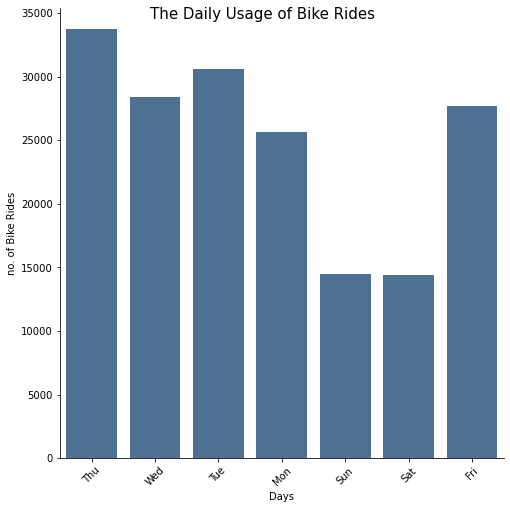

In [90]:
day_plot= sb.catplot(data=new_df, x='start_day', kind='count', color = '#41729F', height =7)
day_plot.set_axis_labels("Days", "no. of Bike Rides")
day_plot.set_xticklabels(rotation=45)
day_plot.fig.suptitle('The Daily Usage of Bike Rides', fontsize=15);

The above plot shows that the rides are highly used during the working days and less intresting in weekends
This might be an indicator to check which time slot per day rides are highly used

### 2. Number of Bike Rides Per hour

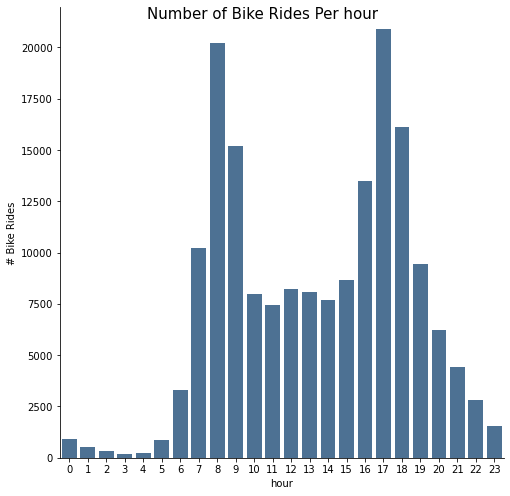

In [94]:
hour_plot  = sb.catplot(data=new_df, x='start_hour', kind='count', color = '#41729F', height = 7)
hour_plot.set_axis_labels("hour", "# Bike Rides")

hour_plot.fig.suptitle('Number of Bike Rides Per hour', fontsize=15);


The above plot confirms that bikes are used as transportation vehicle for work as it's highly used at 8:00 AM and 5:00 PM which is start and end of working day

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

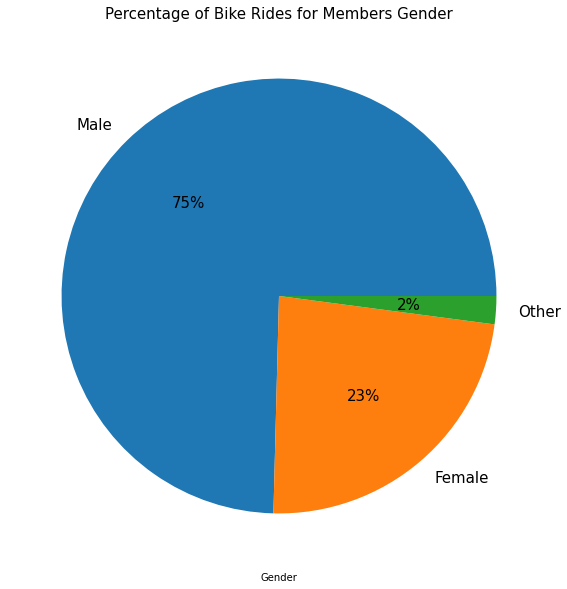

In [95]:
new_df.member_gender.value_counts().plot(kind='pie', figsize=(10,10),fontsize =15, autopct='%1.0f%%')

ax = plt.gca()
ax.set_ylabel('')
ax.set_xlabel('Gender')
ax.set_title("Percentage of Bike Rides for Members Gender", fontsize=15);

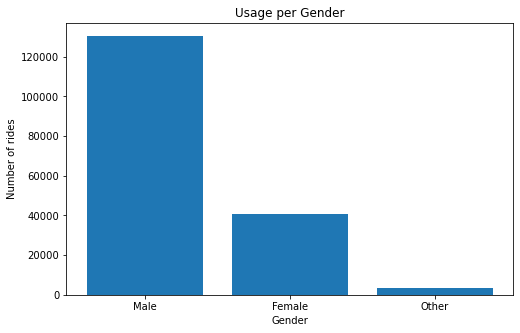

In [97]:
plt.figure(figsize=[8,5])
plt.bar(x = new_df.member_gender.value_counts().keys(), height = new_df.member_gender.value_counts() )
plt.title('Usage per Gender')
plt.xlabel('Gender')
plt.ylabel('Number of rides')
plt.show()

Text(0.5, 1.0, 'Age Distribution for Member')

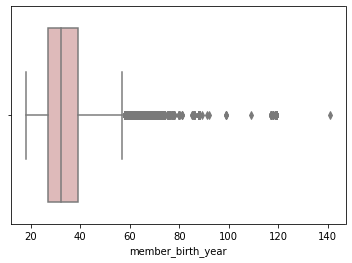

In [86]:
age = sb.boxplot(x=2019-new_df.member_birth_year, color='#E4B4B4')
ax.set_xlabel('Age', fontsize=10)
ax.set_title("Age Distribution for Member", fontsize=15)


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!